# XOR 시간 측정

1MB당 평균 소요 시간 : 0.002045890374617143


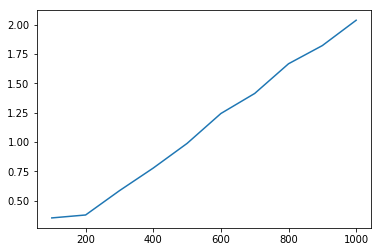

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import time

def XOR(index_data, my_data):
    index_data = np.frombuffer(index_data, dtype='uint8') # 바이너리 해석
    my_data = np.frombuffer(my_data, dtype='uint8')
    
    data = np.bitwise_xor(index_data, my_data) # xor 연산
    data = data.tostring() # 데이터 바이너리화
    
    return data

file_size = [i for i in range(1,11)]
t = []

for size in file_size:
    data1 = open('/Users/winlab/Desktop/A{}00.txt'.format(str(size)), 'rb').read()
    data2 = open('/Users/winlab/Desktop/N{}00.txt'.format(str(size)), 'rb').read()
    
    start_time = time.time()
    data = XOR(data1, data2)

    t.append(time.time() - start_time)
    mean_t = sum(t) / 5500

print('1MB당 평균 소요 시간 :',mean_t)
plt.plot(file_size, t)
plt.show()

# bps를 가정하여 Unicast, Broadcast 비교

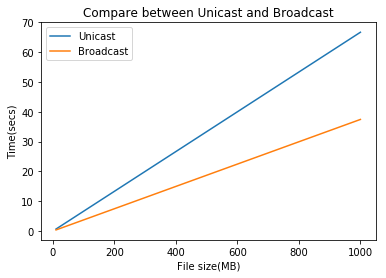

In [9]:
import matplotlib.pyplot as plt

file_size = [i*10 for i in range(1,101)]   # 파일 크기는 100 MB
bps = 30   # BPS 설정
n = 2   # 클라이언트 수
uc_time = []
bc_time = []

for size in file_size:
    XOR_time = size * mean_t   # 1MB당 XOR 하는데 걸리는 시간 곱해주기
    uc_time.append(size / bps * n)
    bc_time.append(size / bps + XOR_time * 2)
    
plt.plot(file_size, uc_time)
plt.plot(file_size, bc_time)
plt.xlabel('File size(MB)')
plt.ylabel('Time(secs)')
plt.title('Compare between Unicast and Broadcast')
plt.legend(['Unicast', 'Broadcast'])
plt.show()

# 실제로 데이터를 받기

# Unicast

In [2]:
import socket
import time
import numpy as np

client = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)  # Using IPv4 Internet protocol and UDP protocol
client.bind(('', 44440))  # Client's IP address and Port Number

N = 1  # Number of iterations to calculate the average time
t = [0] * N
u_t = [0] * 10

for x in range(10):
    for k in range(N):
        n = int(client.recv(16).decode())
        data1 = [0] * n
        data2 = [0] * n

        # Receiving the first file
        for i in range(n):
            data1[i] = client.recv(60000)

        # Receiving the second file
        for i in range(n):
            data2[i] = client.recv(60000)

        start_time = float(client.recv(32).decode())

        data1 = b''.join(data1)
        data2 = b''.join(data2)

        t[k] = time.time() - start_time  # Time spent on file transfer
    
    u_t[x] = sum(t)/N  # Average transfer time
    print('At {}MB, the average transfer time :'.format(str((x+1)*100)), u_t[x])
    
client.close()

At 100MB, the average transfer time : 8.822106838226318
At 200MB, the average transfer time : 16.432716608047485
At 300MB, the average transfer time : 24.08313512802124
At 400MB, the average transfer time : 31.50193953514099
At 500MB, the average transfer time : 39.28632855415344
At 600MB, the average transfer time : 47.709877490997314
At 700MB, the average transfer time : 55.12407922744751
At 800MB, the average transfer time : 63.11617636680603
At 900MB, the average transfer time : 70.89256501197815
At 1000MB, the average transfer time : 79.39354419708252


# Broadcast

In [3]:
import socket
import numpy as np
import time

# The function to XOR two files
def XOR(index_data, my_data):
    index_data = np.frombuffer(index_data, dtype='uint8') 
    my_data = np.frombuffer(my_data, dtype='uint8')
    
    data = np.bitwise_xor(index_data, my_data) 
    data = data.tostring()
    
    return data

# Using IPv4 Internet protocol and UDP protocol
client = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
client.bind(('', 44444))  # Client's IP address and Port Number

N = 1   # Number of iterations to calculate the average time
t = [0] * N
b_t = [0] * 10

for x in range(10):
    # Reading the own file as a binary
    my_data = open('/Users/winlab/Desktop/A{}00.txt'.format(str(x+1)), 'rb').read()
    for k in range(N):
        n = int(client.recv(16).decode())  # number of fragments

        index_data = [0] * n

        for i in range(n):
            index_data[i] = client.recv(60000)

        start_time = float(client.recv(32).decode())

        index_data = b''.join(index_data)
        data = XOR(index_data, my_data)

        t[k] = time.time() - start_time

    b_t[x] = sum(t)/N
    print('At {}MB, the average transfer time :'.format(str((x+1)*100)), b_t[x])
    
client.close()

At 100MB, the average transfer time : 4.986290693283081
At 200MB, the average transfer time : 10.390699625015259
At 300MB, the average transfer time : 16.266525506973267
At 400MB, the average transfer time : 22.002268314361572
At 500MB, the average transfer time : 27.597814798355103
At 600MB, the average transfer time : 33.08754515647888
At 700MB, the average transfer time : 38.78844594955444
At 800MB, the average transfer time : 43.94692516326904
At 900MB, the average transfer time : 49.95143675804138
At 1000MB, the average transfer time : 55.4911572933197


# 측정 데이터 기반 Unicast, Broadcast 비교

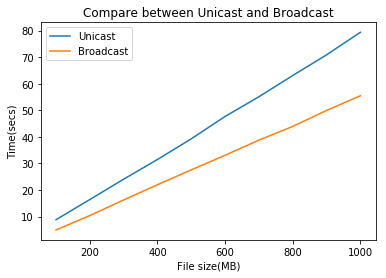

In [6]:
import matplotlib.pyplot as plt

file_size = [(i+1)*100 for i in range(10)]
    
plt.plot(file_size, u_t)
plt.plot(file_size, b_t)
plt.xlabel('File size(MB)')
plt.ylabel('Time(secs)')
plt.title('Compare between Unicast and Broadcast')
plt.legend(['Unicast', 'Broadcast'])
plt.show()